#Case Study: Predicting Playoff Outcomes with Logistic Regression
##Project Overview

###Objective:
To build a predictive model that classifies whether a Major League Baseball team will make the playoffs based on historical performance metrics.

###Purpose:
In the era of Moneyball, teams aim to optimize performance using data. Instead of focusing only on wins, this project applies logistic regression to determine what factors best predict playoff qualification—a binary outcome crucial for team strategy.

#Libraries, Directory, Data

###We begin by importing needed libraries, datasets for our analysis.

In [ ]:
%cd /content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Logistic Regression


In [ ]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
#Load the data
df = pd.read_csv('spam.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


#Analyzing the data

In [ ]:
#Summary Statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


We see that it is very prone to outliers; for instance, we have a total number of words, and between the perecentile, 75% equals 266, and we have a maximum of over 15,000. So, there appears to be a huge discrepancy between the 75% and the maximum.

#Remove Outliers

In [ ]:
#Remove outliers
print(len(df))

4601


We can see that we have 4,601 outliers in our data.

In [ ]:
df = df[df['crl.tot'] < 1500]
print(len(df))

4462


In [ ]:
df = df[df['bang'] < 5]
print(len(df))

4439


In [ ]:
df = df[df['money'] < 6]
print(len(df))

4432


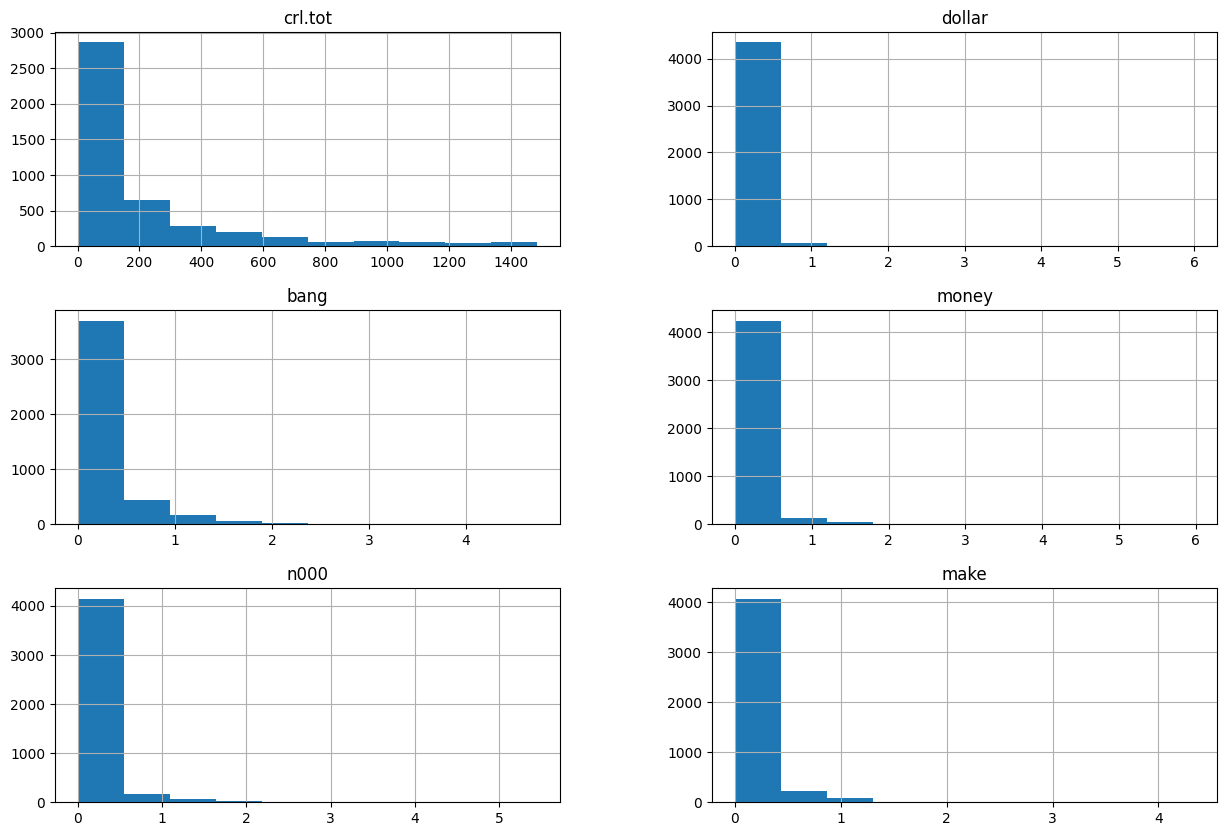

In [ ]:
#Histogram

df.hist(figsize=(15, 10))
plt.show()

<Axes: >

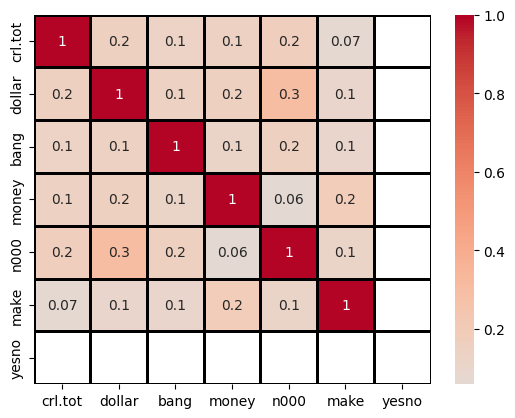

In [ ]:
#Correlation matrix
sns.heatmap(df.corr(),
            annot=True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black')

There is no correlation in our dataset.

#Logistic Regression preparation

In [ ]:
#Prepare dependent variables

df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,0


In [ ]:
#Prepare the X and Y

y = df.yesno
X = df.iloc[:,:-1]
X = sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [ ]:
#Training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

#Logistic Regression

What is it?
* Relationship study between a discreet dependent variable and at least one independent variable.

In [ ]:
#Logistic regression

model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Jul 2024   Pseudo R-squ.:                  0.4210
Time:                        20:27:15   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

We see that all but one coefficient is positive. However, the last one is not statistically significant, meaning that the thousands or the amount of times the money appears correlates with the emails being spam.

Let's put Python to the test to confirm our analysis.

In [ ]:
#Create the function

def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) - 1) * 100, 2)
  print(probability)

In [ ]:
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) - 1) * 100, 2) # probability is defined within the function
  if probability > 0:
    print('The likelihood increase by', probability, '%')
  elif probability == 0:
    print('No impact')
  else:
    print('The liklihood decreases by', probability, '%') # Now all references to probability are in the function scope

In [ ]:
#apply the function
logistic_reader(0.0017)
logistic_reader(6.58)
logistic_reader(-2.1801)

The likelihood increase by 0.17 %
The likelihood increase by 71953.93 %
The liklihood decreases by -88.7 %


* For each word (crl.tot) the likelihood increases by 17%

* For every dollar, the likelihood increase by 70,000%

* For the constant, the likelihoood decreases by -88.7%

#Assess the model

The first step in assessing is to add the prediction is comparing the predictions with what actaully happens.

In [ ]:
#Prediction

predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [ ]:
y_test

167     1
3125    0
2994    0
4150    0
3595    0
       ..
4393    0
383     1
33      1
2409    0
3179    0
Name: yesno, Length: 887, dtype: int64

In [ ]:
#Check the dataset is balanced
y_test.mean()

0.35400225479143177

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


In [ ]:
#True negative
tn

524

In [ ]:
#True positive
tp

212

In [ ]:
#False positive
fp

49

In [ ]:
#False negative
fn

102

#Manual Accuracy Assessment

Here is a hand-on approach with an accuracy assessment.

In [ ]:
#Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', round(accuracy * 100, 1), '%')

Accuracy: 83.0 %


In [ ]:
#F1_Score
f1 = 2 * tp / (2* tp + tn + fp + fn)
print('F1_Score:', round(f1 * 100, 1), '%')

F1_Score: 38.6 %


In [ ]:
#Specificity
specificity = tn / (tn + fp)
print('Specificity:', round(specificity * 100, 1), '%')

Specificity: 91.4 %


In [ ]:
#Sensitivity
sensitivity = tp / (tp + fn)
print('Sensitivity:', round(sensitivity * 100, 1), '%')

Sensitivity: 67.5 %


#Classifcation Report

In [ ]:
#Classification Report
from sklearn.metrics import classification_report # Correct the module name to 'sklearn'
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

